In [129]:
# 导入tushare
import tushare as ts
import pandas as pd

In [130]:
ah_k = pd.read_csv(r"data\AH_premium_analysis.csv", encoding="utf-8-sig")
ah_k.columns

Index(['ts_code_A', 'ts_code_HK', 'trade_date', 'name', 'p_a_adj', 'p_hk_adj',
       'p_hk', 'p_a', 'adj_factor_HK', 'adj_factor_A', 'adj_base_HK',
       'adj_base_A', 'hk2cn', 'AH_premium_adj', 'AH_premium'],
      dtype='object')

In [131]:
ah_k

,ts_code_A,ts_code_HK,trade_date,name,p_a_adj,p_hk_adj,p_hk,p_a,adj_factor_HK,adj_factor_A,adj_base_HK,adj_base_A,hk2cn,AH_premium_adj,AH_premium
0,000333.SZ,00300.HK,20240919,美的集团,62.270696,64.25,64.25,65.28,1.0,5.347,1.0,5.6054,0.903838,0.072310,0.124130
1,000333.SZ,00300.HK,20240923,美的集团,64.483748,67.60,67.60,67.60,1.0,5.347,1.0,5.6054,0.900349,0.059480,0.110681
2,000333.SZ,00300.HK,20240924,美的集团,64.903465,70.15,70.15,68.04,1.0,5.347,1.0,5.6054,0.903029,0.024562,0.074075
3,000333.SZ,00300.HK,20240925,美的集团,66.878041,70.70,70.70,70.11,1.0,5.347,1.0,5.6054,0.896083,0.055640,0.106655
4,000333.SZ,00300.HK,20240926,美的集团,70.169001,77.70,77.70,73.56,1.0,5.347,1.0,5.6054,0.898161,0.005473,0.054063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217021,688331.SH,09995.HK,20250625,荣昌生物,74.350000,67.05,67.05,74.35,1.0,1.000,1.0,1.0000,0.912076,0.215769,0.215769
217022,688331.SH,09995.HK,20250626,荣昌生物,60.700000,59.20,59.20,60.70,1.0,1.000,1.0,1.0000,0.913421,0.122525,0.122525
217023,688331.SH,09995.HK,20250630,荣昌生物,60.500000,54.45,54.45,60.50,1.0,1.000,1.0,1.0000,0.912101,0.218188,0.218188
217024,688331.SH,09995.HK,20250702,荣昌生物,62.790000,55.25,55.25,62.79,1.0,1.000,1.0,1.0000,0.913276,0.244389,0.244389


In [132]:
ah_hk_adj = pd.read_csv(r"data\AH_stock_daily_HK_adj_factor.csv", encoding="utf-8-sig")
ah_hk_mv = ah_hk_adj[["ts_code", "trade_date", "total_mv"]]
ah_hk_mv = ah_hk_mv.rename(columns={"ts_code": "ts_code_HK"})
ah_hk_mv

,ts_code_HK,trade_date,total_mv
0,02039.HK,20250704,3.665915e+10
1,02039.HK,20250703,3.705579e+10
2,02039.HK,20250702,3.658166e+10
3,02039.HK,20250630,3.536244e+10
4,02039.HK,20250627,3.561027e+10
...,...,...,...
295464,00981.HK,20100621,1.550531e+10
295465,00981.HK,20100618,1.483117e+10
295466,00981.HK,20100617,1.483117e+10
295467,00981.HK,20100615,1.438174e+10


In [133]:
ah_k = pd.merge(ah_k, ah_hk_mv, on=["ts_code_HK", "trade_date"], how="inner")
ah_k

,ts_code_A,ts_code_HK,trade_date,name,p_a_adj,p_hk_adj,p_hk,p_a,adj_factor_HK,adj_factor_A,adj_base_HK,adj_base_A,hk2cn,AH_premium_adj,AH_premium,total_mv
0,000333.SZ,00300.HK,20240919,美的集团,62.270696,64.25,64.25,65.28,1.0,5.347,1.0,5.6054,0.903838,0.072310,0.124130,4.870419e+11
1,000333.SZ,00300.HK,20240923,美的集团,64.483748,67.60,67.60,67.60,1.0,5.347,1.0,5.6054,0.900349,0.059480,0.110681,5.056471e+11
2,000333.SZ,00300.HK,20240924,美的集团,64.903465,70.15,70.15,68.04,1.0,5.347,1.0,5.6054,0.903029,0.024562,0.074075,5.106079e+11
3,000333.SZ,00300.HK,20240925,美的集团,66.878041,70.70,70.70,70.11,1.0,5.347,1.0,5.6054,0.896083,0.055640,0.106655,5.262942e+11
4,000333.SZ,00300.HK,20240926,美的集团,70.169001,77.70,77.70,73.56,1.0,5.347,1.0,5.6054,0.898161,0.005473,0.054063,5.506264e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217021,688331.SH,09995.HK,20250625,荣昌生物,74.350000,67.05,67.05,74.35,1.0,1.000,1.0,1.0000,0.912076,0.215769,0.215769,6.359158e+10
217022,688331.SH,09995.HK,20250626,荣昌生物,60.700000,59.20,59.20,60.70,1.0,1.000,1.0,1.0000,0.913421,0.122525,0.122525,5.424702e+10
217023,688331.SH,09995.HK,20250630,荣昌生物,60.500000,54.45,54.45,60.50,1.0,1.000,1.0,1.0000,0.912101,0.218188,0.218188,5.171860e+10
217024,688331.SH,09995.HK,20250702,荣昌生物,62.790000,55.25,55.25,62.79,1.0,1.000,1.0,1.0000,0.913276,0.244389,0.244389,5.304692e+10


In [134]:
ah_k = ah_k[
    [
        "ts_code_A",
        "ts_code_HK",
        "trade_date",
        "name",
        "p_a_adj",
        "p_hk_adj",
        "hk2cn",
        "AH_premium_adj",
        "total_mv",
    ]
]
ah_k

,ts_code_A,ts_code_HK,trade_date,name,p_a_adj,p_hk_adj,hk2cn,AH_premium_adj,total_mv
0,000333.SZ,00300.HK,20240919,美的集团,62.270696,64.25,0.903838,0.072310,4.870419e+11
1,000333.SZ,00300.HK,20240923,美的集团,64.483748,67.60,0.900349,0.059480,5.056471e+11
2,000333.SZ,00300.HK,20240924,美的集团,64.903465,70.15,0.903029,0.024562,5.106079e+11
3,000333.SZ,00300.HK,20240925,美的集团,66.878041,70.70,0.896083,0.055640,5.262942e+11
4,000333.SZ,00300.HK,20240926,美的集团,70.169001,77.70,0.898161,0.005473,5.506264e+11
...,...,...,...,...,...,...,...,...,...
217021,688331.SH,09995.HK,20250625,荣昌生物,74.350000,67.05,0.912076,0.215769,6.359158e+10
217022,688331.SH,09995.HK,20250626,荣昌生物,60.700000,59.20,0.913421,0.122525,5.424702e+10
217023,688331.SH,09995.HK,20250630,荣昌生物,60.500000,54.45,0.912101,0.218188,5.171860e+10
217024,688331.SH,09995.HK,20250702,荣昌生物,62.790000,55.25,0.913276,0.244389,5.304692e+10


In [135]:
SH300_k = pd.read_csv(r"data\SH300_daily_k.csv", encoding="utf-8-sig")
SH300_k

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
0,000300.SH,20250704,3982.2034,3967.4637,4013.8478,3958.3762,3968.0676,14.1358,0.3562,157197133.0,2.905130e+08
1,000300.SH,20250703,3968.0676,3949.3998,3971.6160,3945.1380,3943.6849,24.3827,0.6183,141004006.0,2.696096e+08
2,000300.SH,20250702,3943.6849,3943.3232,3952.1378,3929.6956,3942.7620,0.9229,0.0234,147063062.0,2.466378e+08
3,000300.SH,20250701,3942.7620,3935.9078,3946.2451,3924.7219,3936.0791,6.6829,0.1698,128959362.0,2.360703e+08
4,000300.SH,20250630,3936.0791,3920.3149,3940.3611,3911.6044,3921.7578,14.3213,0.3652,145170236.0,2.888214e+08
...,...,...,...,...,...,...,...,...,...,...,...
3651,000300.SH,20100623,2758.4950,2768.6950,2788.2190,2734.0470,2783.7200,-25.2250,-0.9062,35600350.0,4.160024e+07
3652,000300.SH,20100622,2783.7200,2772.8860,2795.3230,2766.4430,2780.6630,3.0570,0.1099,39096052.0,4.520721e+07
3653,000300.SH,20100621,2780.6630,2698.9840,2784.4700,2686.3230,2696.1660,84.4970,3.1340,55261482.0,6.280919e+07
3654,000300.SH,20100618,2696.1660,2739.0320,2755.8420,2686.6140,2742.7330,-46.5670,-1.6978,41808344.0,5.025635e+07


In [136]:
HSI_k = pd.read_csv(r"data\HSI_daily_k.csv", encoding="utf-8-sig")
HSI_k

,ts_code,trade_date,open,close,high,low,pre_close,change,pct_chg,swing,vol
0,HSI,20250704,23900.69,23916.06,24068.51,23690.94,24069.94,-153.88,-0.64,1.57,4021196.00
1,HSI,20250703,24234.28,24069.94,24269.14,23920.00,24221.41,-151.47,-0.63,1.44,3594907.00
2,HSI,20250702,24304.31,24221.41,24372.70,24122.57,24072.28,149.13,0.62,1.04,4061334.00
3,HSI,20250630,24274.91,24072.28,24274.91,24064.26,24284.15,-211.87,-0.87,0.87,3775880.00
4,HSI,20250627,24451.19,24284.15,24471.53,24194.85,24325.40,-41.25,-0.17,1.14,4341564.00
...,...,...,...,...,...,...,...,...,...,...,...
3701,HSI,20100621,20571.40,20912.18,20938.33,20571.40,20286.71,625.47,3.08,1.81,3171247.00
3702,HSI,20100618,20199.22,20286.71,20315.42,20138.35,20138.40,148.31,0.74,0.88,1413431.00
3703,HSI,20100617,20201.81,20138.40,20201.81,20078.59,20062.15,76.25,0.38,0.61,1034863.00
3704,HSI,20100615,19998.53,20062.15,20142.10,19970.91,20051.91,10.24,0.05,0.85,996054.69


In [137]:
IXIC_k = pd.read_csv(r"data\IXIC_daily_k.csv", encoding="utf-8-sig")
IXIC_k

,ts_code,trade_date,open,close,high,low,pre_close,change,pct_chg,swing,vol
0,IXIC,20250703,NaN,20601.10,20624.51,20480.22,20393.13,207.97,1.02,0.71,NaN
1,IXIC,20250702,NaN,20393.13,20397.22,20181.74,20202.89,190.24,0.94,1.07,NaN
2,IXIC,20250701,NaN,20202.89,20339.05,20105.42,20369.73,-166.84,-0.82,1.15,NaN
3,IXIC,20250630,NaN,20369.73,20418.31,20266.36,20273.46,96.27,0.47,0.75,NaN
4,IXIC,20250627,NaN,20273.46,20311.51,20095.05,20167.91,105.55,0.52,1.07,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3783,IXIC,20100618,2308.94,2309.80,2321.99,2301.48,2307.16,2.64,0.11,0.89,NaN
3784,IXIC,20100617,2316.59,2307.16,2318.27,2288.59,2305.93,1.23,0.05,1.29,NaN
3785,IXIC,20100616,2293.56,2305.93,2317.75,2290.26,2305.88,0.05,0.00,1.19,NaN
3786,IXIC,20100615,2256.48,2305.88,2307.98,2256.44,2243.96,61.92,2.76,2.30,NaN


我有如图的数据表，其中：
* trade_date : 日期
* p_a_adj : 股票对应日期的A股的复权前复权价格
* p_hk_adj : 股票对应日期的H股的复权前复权价格
* hk2cn : 当日的港币兑人民币汇率（1港币可以换多少人民币）
* AH_premium_adj : A股相对于H股当日的溢价

我希望构建一个基于AH溢价的选股策略：
* 首先帮我写一个函数：
    * 其参数是日期
    * 输出是两个 list ，一个list是AH溢价最高的5支股票名字，一个是AH溢价最低的5支股票名字
* 以及一个交易策略回测函数：
    * 待定参数是策略周期:X个月
    * 每个周期一开始把手上的钱均分成10份，其中5份对应平均购买那5支AH溢价最高的股票的H股，另外5份平均购买AH溢价最低的股票的A股
    * 每个周期结束后进入下一个周期，用同样策略重新配置仓位
* 分别绘制出策略周期X为1个月、2个月、3个月、6个月情况下的策略收益曲线，从2018年开始模拟，并加入恒生指数和沪深300指数作为对比

以上是已经实现的部分（留作说明）
补充考虑资金量和交易成本（H股交易双向都按0.05%计算，A股交易双向都按0.01%计算，且每次交易至少5元/港元，几个值都用变量来配置），初始资金默认用100万
代码如下，请对代码进行修改



In [138]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# ———— 配置中文字体 & 负号 ————
matplotlib.rcParams["font.sans-serif"] = ["Microsoft YaHei", "SimHei"]
matplotlib.rcParams["axes.unicode_minus"] = False


def get_top_bottom(
    ah_df: pd.DataFrame, date: str | pd.Timestamp, split_n: int = 5
) -> tuple[list[str], list[str]]:
    """返回指定交易日 date 当天 AH 溢价最高和最低的股票名称列表。"""
    df = ah_df.copy()
    # 转 datetime
    if df["trade_date"].dtype == object or np.issubdtype(
        df["trade_date"].dtype, np.number
    ):
        df["trade_date"] = pd.to_datetime(df["trade_date"].astype(str), format="%Y%m%d")
    if isinstance(date, str):
        date = pd.to_datetime(date, format="%Y%m%d")
    today = df[df["trade_date"] == date].dropna(subset=["AH_premium_adj"])
    top_n = today.nlargest(split_n, "AH_premium_adj")["name"].tolist()
    bot_n = today.nsmallest(split_n, "AH_premium_adj")["name"].tolist()
    return top_n, bot_n

In [139]:
def backtest_ah_strategy(
    ah_df: pd.DataFrame,
    start_date: str = "20180101",
    months: int = 1,
    initial_capital: float = 1.0,
    rate_A: float = 0.0001,
    rate_H: float = 0.0005,
    min_fee_A: float = 5.0,
    min_fee_H: float = 5.0,
    split_n: int = 5,
    mv_quantile: float = 0.5,
) -> pd.DataFrame:
    """
    AH 溢价轮动回测（离散周期估值），返回每期末的净值曲线。
    买卖双向都按 rate_A/ rate_H 计算手续费，且每笔至少收取 min_fee_A (元) 或 min_fee_H (港元)。
    港股最低手续费在买卖日分别按当日汇率换算成人民币。
    """
    df = ah_df.copy()
    df["trade_date"] = pd.to_datetime(df["trade_date"].astype(str), format="%Y%m%d")
    df = df.sort_values("trade_date")
    df["ph_cny"] = df["p_hk_adj"] * df["hk2cn"]

    # 所有可交易日
    dates = df["trade_date"].drop_duplicates().sort_values()
    dates = dates[dates >= pd.to_datetime(start_date, format="%Y%m%d")]
    if dates.empty:
        raise ValueError("start_date 之后没有数据")

    # 构造周期起始/结束列表
    period_starts = []
    cur = dates.min()
    last = dates.max()
    while cur <= last:
        ps = dates[dates >= cur].min()
        period_starts.append(ps)
        cur = ps + pd.DateOffset(months=months)
    period_starts = [d for d in period_starts if d <= last]

    period_ends = []
    for i in range(len(period_starts) - 1):
        nxt = period_starts[i + 1]
        pe = dates[dates < nxt].max()
        period_ends.append(pe)
    period_ends.append(last)

    capital = initial_capital
    records = []
    for ps, pe in zip(period_starts, period_ends):
        # —— 选股：先按市值过滤，再按溢价排前后 —— #
        df_ps = df[df["trade_date"] == ps].set_index("name")
        # 只保留同时有市值和溢价数据的行
        valid = df_ps.dropna(subset=["total_mv", "AH_premium_adj"])
        # 找到市值 mv_quantile 分位点（市值最高的 1-mv_quantile 起点）
        mv_thresh = valid["total_mv"].quantile(mv_quantile)
        universe = valid[valid["total_mv"] >= mv_thresh]

        # 在 universe 里取 top/bottom 溢价
        topn = universe["AH_premium_adj"].nlargest(split_n).index.tolist()
        botn = universe["AH_premium_adj"].nsmallest(split_n).index.tolist()

        alloc = capital / (split_n * 2)  # 每只股票投入资金

        # —— 买入份额 & 手续费 —— #
        price_top_buy = df_ps.loc[topn, "ph_cny"]
        shares_top = alloc / price_top_buy
        price_bot_buy = df_ps.loc[botn, "p_a_adj"]
        shares_bot = alloc / price_bot_buy

        hk2cn_buy = df_ps.loc[topn, "hk2cn"]
        min_fee_H_buy_cny = min_fee_H * hk2cn_buy
        comm_buy_top = np.maximum(
            shares_top * price_top_buy * rate_H, min_fee_H_buy_cny
        )
        comm_buy_bot = np.maximum(shares_bot * price_bot_buy * rate_A, min_fee_A)
        total_comm_buy = comm_buy_top.sum() + comm_buy_bot.sum()

        # —— 平仓时点最后价 & 手续费 —— #
        df_end = (
            df[df["trade_date"] <= pe]
            .sort_values("trade_date")
            .groupby("name", as_index=True)
            .last()
        )
        price_top_sell = df_end["ph_cny"].reindex(topn).fillna(0)
        hk2cn_sell = df_end["hk2cn"].reindex(topn).fillna(0)
        price_bot_sell = df_end["p_a_adj"].reindex(botn).fillna(0)

        revenue_top = shares_top * price_top_sell
        revenue_bot = shares_bot * price_bot_sell
        min_fee_H_sell_cny = min_fee_H * hk2cn_sell
        comm_sell_top = np.maximum(revenue_top * rate_H, min_fee_H_sell_cny)
        comm_sell_bot = np.maximum(revenue_bot * rate_A, min_fee_A)
        net_top = (revenue_top - comm_sell_top).sum()
        net_bot = (revenue_bot - comm_sell_bot).sum()

        # —— 更新资金 & 记录 —— #
        capital = net_top + net_bot - total_comm_buy
        records.append({"date": pe, "equity": capital})

    return pd.DataFrame(records)

In [ ]:
def test(
    start_dt_str: str = "20180101",
    initial_capital: float = 1_000_000,
    split_n: int = 5,
    mv_quantile: float = 0.0,
    rate_A=0.0001,  # A 股双向费率 0.01%
    rate_H=0.0005,  # H 股双向费率 0.05%
    min_fee_A=5.0,  # A 股每笔最低 5 元
    min_fee_H=5.0,  # H 股每笔最低 5 港元
):

    start_dt = pd.to_datetime(start_dt_str, format="%Y%m%d")

    # —— 1. make local copies —— #
    sh300 = SH300_k.copy()
    hsi = HSI_k.copy()
    ixic = IXIC_k.copy()


    # —— 2. 准备指数归一化序列 —— #
    for df in (sh300, hsi, ixic):
        if not pd.api.types.is_datetime64_any_dtype(df["trade_date"]):
            df["trade_date"] = pd.to_datetime(
                df["trade_date"].astype(str), format="%Y%m%d"
            )
        df.set_index("trade_date", inplace=True)
        df["norm"] = df["close"] / df["close"].iloc[0]

    # 上证 300
    sh300 = (
        SH300_k[SH300_k["trade_date"] >= start_dt]
        .sort_values("trade_date")
        .set_index("trade_date")
    )
    sh300["norm"] = sh300["close"] / sh300["close"].iloc[0]

    # 恒生指数
    hsi = (
        HSI_k[HSI_k["trade_date"] >= start_dt]
        .sort_values("trade_date")
        .set_index("trade_date")
    )
    hsi["norm"] = hsi["close"] / hsi["close"].iloc[0]

    # 纳斯达克指数
    ixic = (
        IXIC_k[IXIC_k["trade_date"] >= start_dt]
        .sort_values("trade_date")
        .set_index("trade_date")
    )
    ixic["norm"] = ixic["close"] / ixic["close"].iloc[0]


    # —— 3. 回测并绘图 —— #

    plt.figure(figsize=(12, 6))


    # 3.1 三大指数

    plt.plot(sh300.index, sh300["norm"], label="沪深300 指数", linewidth=1.2)


    plt.plot(hsi.index, hsi["norm"], label="恒生指数", linewidth=1.2)


    plt.plot(ixic.index, ixic["norm"], label="纳斯达克指数", linewidth=1.2)


    # 3.2 策略（1、2、3、6 个月）

    for m in [1, 2, 3, 6]:

        eq = backtest_ah_strategy(
            ah_k,
            start_date=start_dt_str,

            months=m,
            initial_capital=initial_capital,
            rate_A=rate_A,
            rate_H=rate_H,
            min_fee_A=min_fee_A,
            min_fee_H=min_fee_H,

            split_n=split_n,
            mv_quantile=mv_quantile,
        )
        plt.plot(

            eq["date"],

            eq["equity"] / initial_capital,

            label=f"{m} 个月轮动策略",
            linestyle="--",
            marker="o",
        )


    plt.title(f"AH 溢价策略 vs. 三大指数（{start_dt_str} 起）")

    plt.xlabel("日期")

    plt.ylabel("归一化收益（基准=1）")

    plt.legend(loc="upper left", fontsize=9)

    plt.grid(True)

    # —— 关键：让 y 轴从 0 开始 —— #

    plt.ylim(bottom=0)

    plt.tight_layout()

    plt.show()

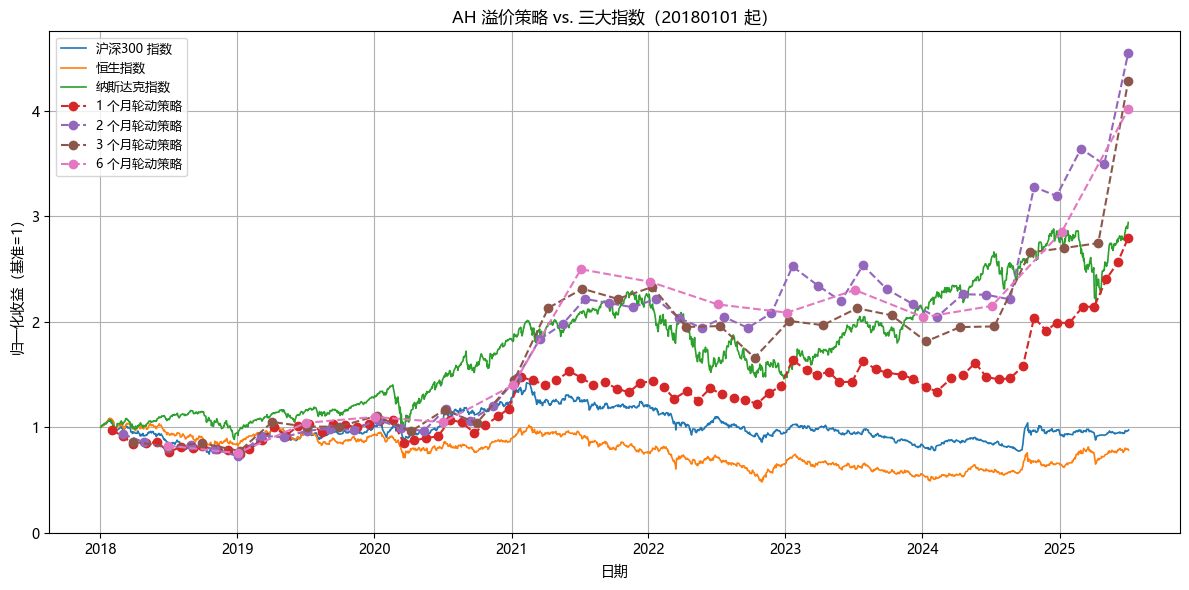

In [141]:
test()  # 原策略 选top5和bot5

In [142]:
test(split_n=3)  # 改选top2和bot2

ValueError: time data "2025-07-04" doesn't match format "%Y%m%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
test(mv_quantile=0.5)  # 在市值前50%的公司里选top5和bot5

# 策略执行

In [ ]:
# 假设前面已经定义了 get_top_bottom()，并且 ah_k 已经读取完毕

# 指定想要查询的日期
query_date = "20250703"

# 调用函数
top5, bot5 = get_top_bottom(ah_k, query_date, split_n=5)

# 输出结果
print(f"{query_date} AH 溢价最高的 5 支：\n", top5)
print(f"{query_date} AH 溢价最低的 5 支：\n", bot5)

20250703 AH 溢价最高的 5 支：
 ['弘业期货', '复旦张江', '凯盛新能', '上海电气', '广汽集团']
20250703 AH 溢价最低的 5 支：
 ['中国联通', '中国重汽', '宁德时代', '招商银行', '药明康德']
